# CS235 Fall 2024 Course Project Phase 2

Student 1 - Name: Ashok Kumar J (862467018)

Student 2 - Name: Dan Shay (862546326)

In [40]:
!pip install ucimlrepo

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import itertools, collections
import numpy as np
import pandas as pd

from ucimlrepo import fetch_ucirepo

In [42]:
# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

X

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Exploratory Data Analysis (EDA)

### Pairwise correlation between features

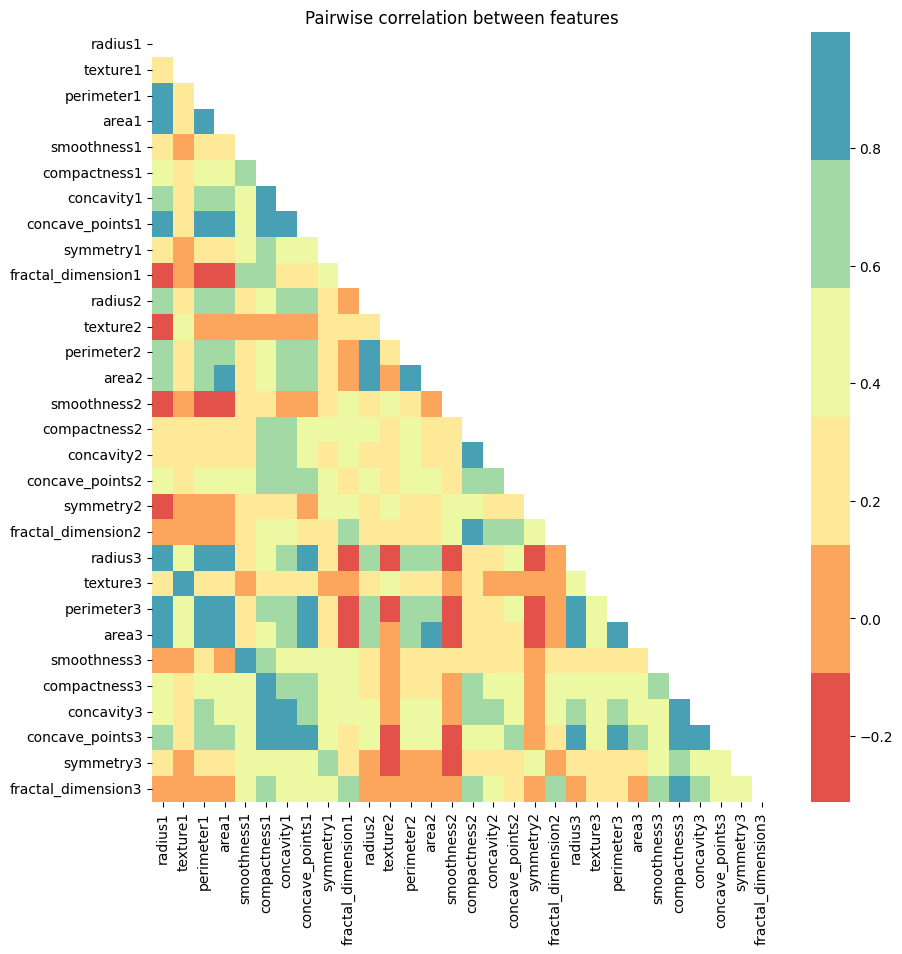

In [43]:
correlation = X.corr()

fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(correlation, annot=False, mask=np.triu(correlation),
            cmap=sns.color_palette("Spectral"))
ax.set_title("Pairwise correlation between features")
plt.show()

### Class-wise counts

In [44]:
print(collections.Counter(y['Diagnosis']))

Counter({'B': 357, 'M': 212})


### Class-wise features distributions

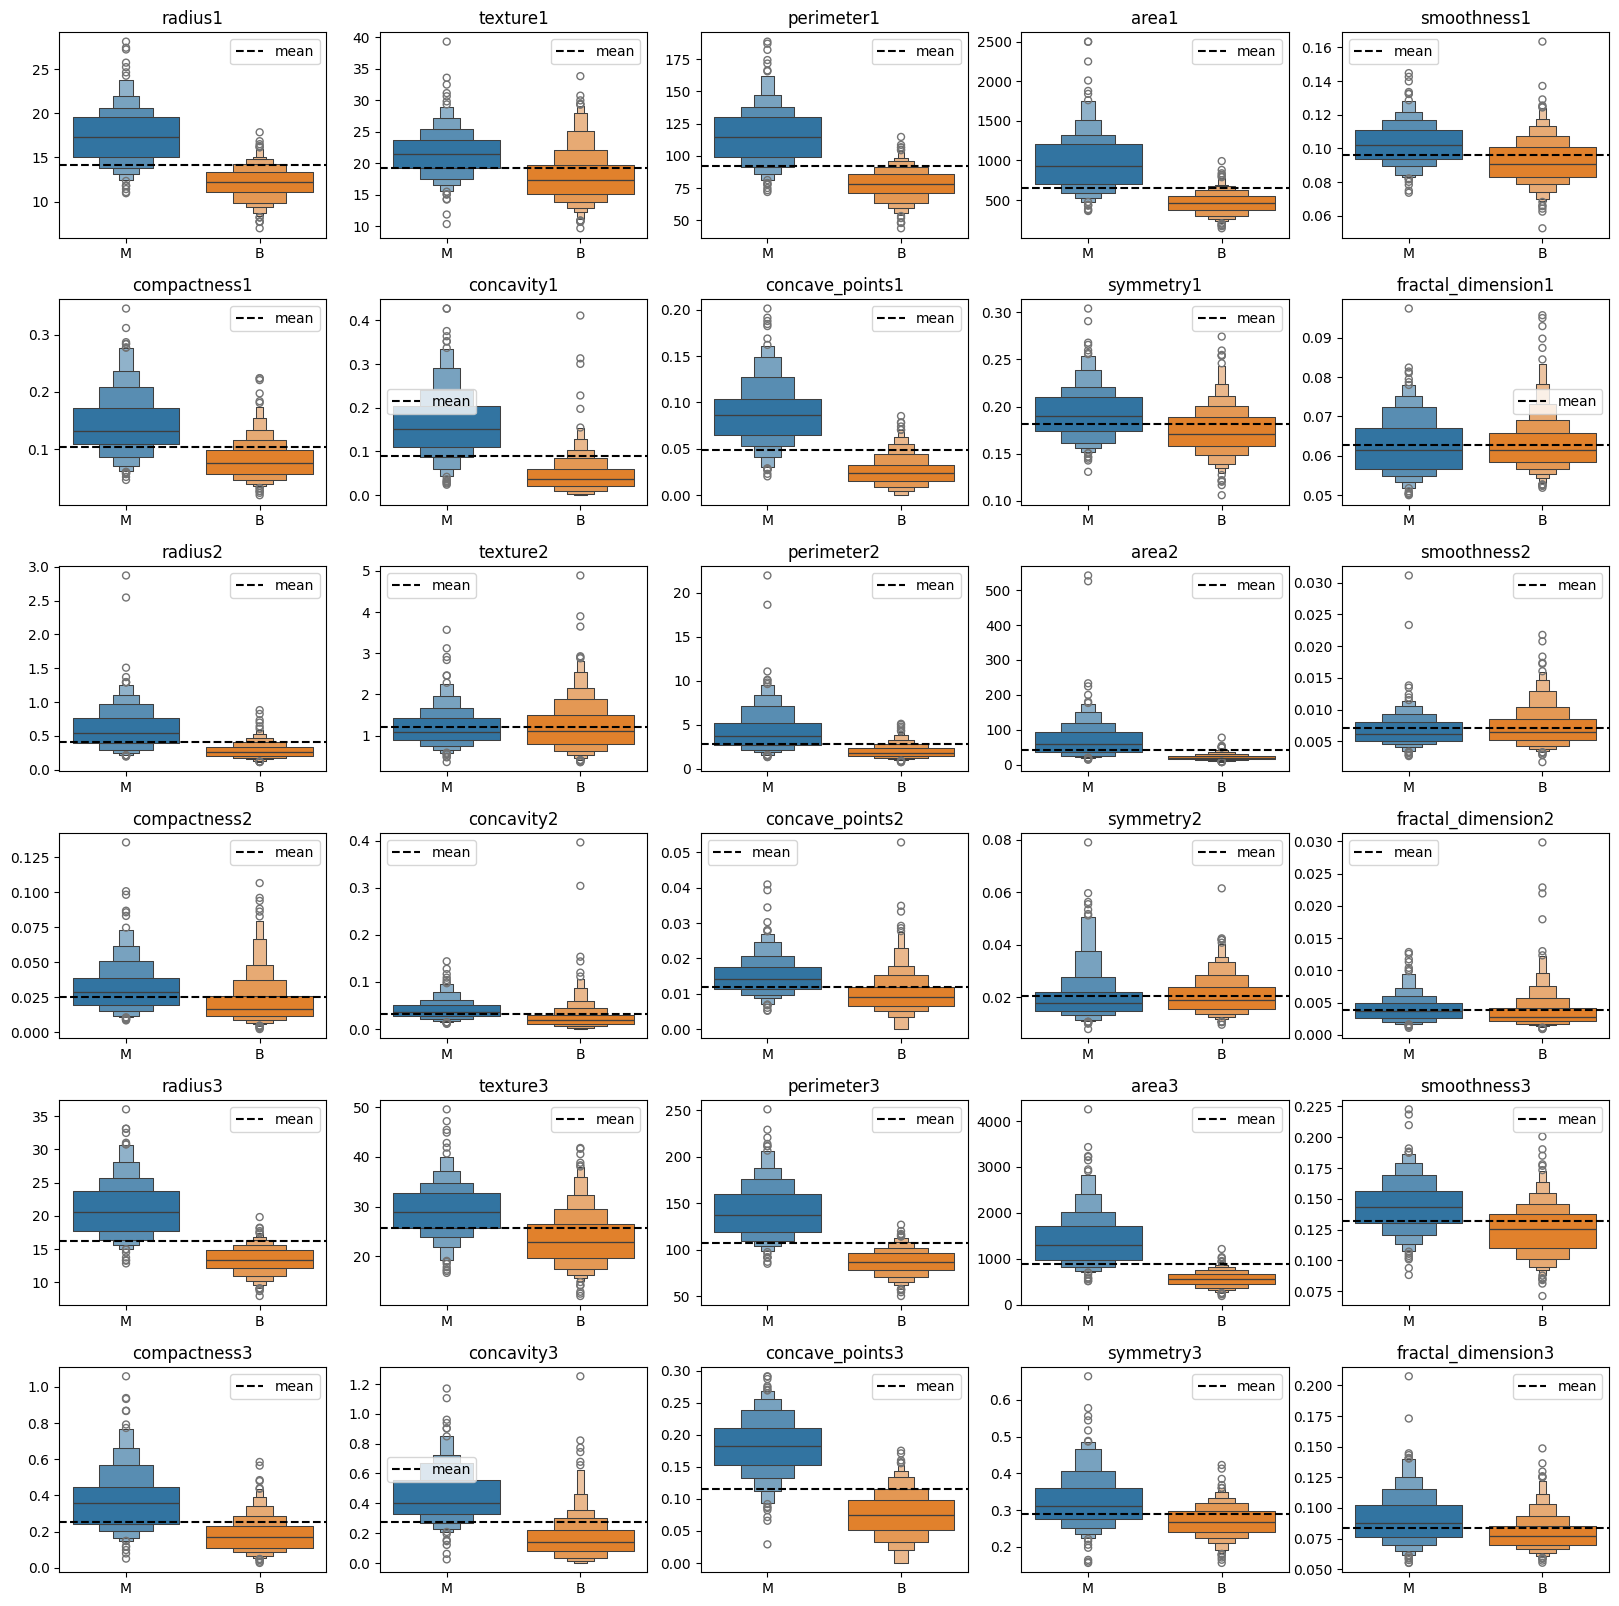

In [45]:
plt.figure(figsize=(20,20))

for i,j in itertools.zip_longest(list(X.columns), range(len(list(X.columns)))):
  plt.subplot(6,5,j+1)
  sns.boxenplot(x=y['Diagnosis'], y=X[i], hue=y['Diagnosis'])
  plt.title(i)
  plt.xlabel('')
  plt.ylabel('')
  plt.subplots_adjust(hspace=.3)
  plt.axhline(X[i].mean(), linestyle="dashed", color='k', label='mean')
  plt.legend(loc='best')

# Phase 2 - Unsupervised Techniques

## Q1 - k-Means clustering

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [47]:
# Standardize the data to ensure all features contribute equally to distance calculations
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Impute missing values with the mean of each feature
imputer = SimpleImputer(strategy='mean')
X_scaled = imputer.fit_transform(X_scaled)

# Verify there are no remaining NaN values
print("Number of NaN values after handling:", np.isnan(X_scaled).sum())


Number of NaN values after handling: 0


In [48]:
def initialize_centroids(X, k, init_method='random'):
    """
    Initialize the centroids for k-means clustering.
    
    Parameters:
    X (ndarray): The dataset, shape (n_samples, n_features).
    k (int): The number of clusters.
    init_method (str): Method for initializing centroids ('random' or 'kmeans++').
    
    Returns:
    ndarray: Initial centroids, shape (k, n_features).
    """
    if init_method == 'random':
        # Random initialization: Select k random data points as centroids
        indices = np.random.choice(X.shape[0], k, replace=False)
        return X[indices]
    elif init_method == 'kmeans++':
        # k-means++ initialization: Start with one random centroid, then iteratively choose the next
        centroids = []
        centroids.append(X[np.random.choice(range(X.shape[0]))])  # First centroid randomly
        for _ in range(1, k):
            # Compute squared distances to the nearest centroid for each data point
            dist_sq = np.min(np.linalg.norm(X[:, np.newaxis] - np.array(centroids), axis=2)**2, axis=1)
            prob = dist_sq / dist_sq.sum()  # Probability proportional to squared distance
            cumulative_prob = np.cumsum(prob)
            r = np.random.rand()  # Random number to select next centroid
            for i, p in enumerate(cumulative_prob):
                if r < p:
                    centroids.append(X[i])
                    break
        return np.array(centroids)

In [49]:
def assign_clusters(X, centroids):
    """
    Assign each data point to the nearest centroid.
    
    Parameters:
    X (ndarray): The dataset, shape (n_samples, n_features).
    centroids (ndarray): Current centroids, shape (k, n_features).
    
    Returns:
    ndarray: Cluster assignments for each data point, shape (n_samples,).
    """
    # Compute distances between each data point and each centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    # Assign each point to the cluster with the nearest centroid
    return np.argmin(distances, axis=1)

def compute_centroids(X, labels, k):
    """
    Compute new centroids as the mean of all points assigned to each cluster.
    
    Parameters:
    X (ndarray): The dataset, shape (n_samples, n_features).
    labels (ndarray): Cluster assignments for each data point, shape (n_samples,).
    k (int): Number of clusters.
    
    Returns:
    ndarray: Updated centroids, shape (k, n_features).
    """
    # Compute the mean of all points assigned to each cluster
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

In [50]:
def kmeans(X, k, init_method='random', max_iters=100, tol=1e-4):
    """
    Perform k-means clustering using Lloyd's algorithm.
    
    Parameters:
    X (ndarray): The dataset, shape (n_samples, n_features).
    k (int): Number of clusters.
    init_method (str): Method for initializing centroids ('random' or 'kmeans++').
    max_iters (int): Maximum number of iterations to run the algorithm.
    tol (float): Convergence tolerance for changes in centroid positions.
    
    Returns:
    tuple: (Cluster assignments, Final centroids)
    """
    # Initialize centroids based on the specified method
    centroids = initialize_centroids(X, k, init_method)
    for iteration in range(max_iters):
        old_centroids = centroids  # Keep a copy of the previous centroids
        # Step 1: Assign points to the nearest cluster
        labels = assign_clusters(X, centroids)
        # Step 2: Compute new centroids
        centroids = compute_centroids(X, labels, k)
        # Check for convergence (if centroids do not change significantly)
        if np.linalg.norm(centroids - old_centroids) < tol:
            break
    return labels, centroids

def evaluate_kmeans(X, k_range, init_method):
    """
    Evaluate k-means performance for a range of cluster numbers.
    
    Parameters:
    X (ndarray): The dataset, shape (n_samples, n_features).
    k_range (range): Range of cluster numbers to evaluate (e.g., range(1, 6)).
    init_method (str): Method for initializing centroids ('random' or 'kmeans++').
    
    Returns:
    list: Mean and standard deviation of silhouette scores for each k.
    """
    silhouette_scores = []
    for k in k_range:
        scores = []
        for _ in range(10):  # Run k-means 10 times with different initializations
            labels, _ = kmeans(X, k, init_method)
            if k > 1:  # Silhouette score is undefined for k=1
                score = silhouette_score(X, labels)
                scores.append(score)
        # Store mean and standard deviation of scores for this k
        silhouette_scores.append((np.mean(scores), np.std(scores)))
    return silhouette_scores

In [51]:
# Evaluate performance for k ranging from 1 to 5
k_range = range(1, 6)

# Random initialization
random_scores = evaluate_kmeans(X_scaled, k_range, 'random')

# k-means++ initialization
kmeanspp_scores = evaluate_kmeans(X_scaled, k_range, 'kmeans++')

/home/reggastation/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/reggastation/.local/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/reggastation/.local/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/reggastation/.local/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/reggastation/.local/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/reggastation/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: Runt

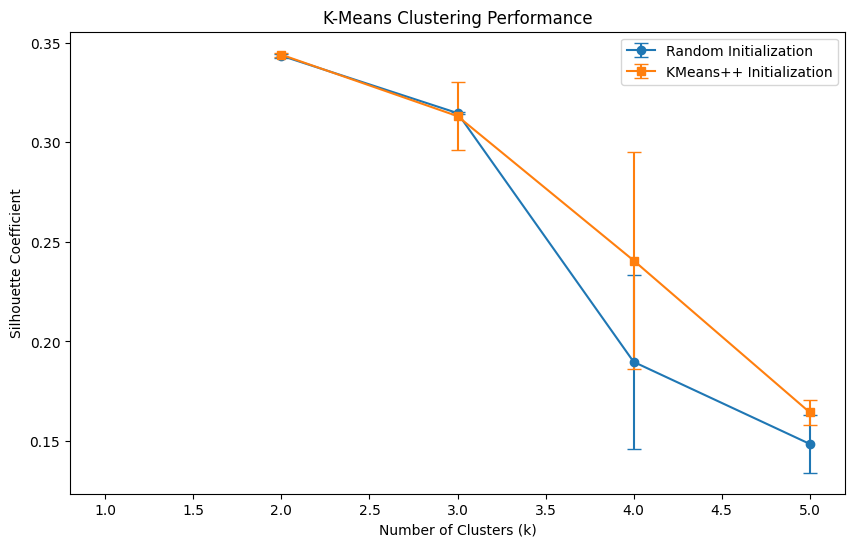

In [52]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(k_range, [s[0] for s in random_scores], yerr=[s[1] for s in random_scores],
             label='Random Initialization', capsize=5, fmt='o-')
plt.errorbar(k_range, [s[0] for s in kmeanspp_scores], yerr=[s[1] for s in kmeanspp_scores],
             label='KMeans++ Initialization', capsize=5, fmt='s-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('K-Means Clustering Performance')
plt.legend()
plt.show()

## Q2 - Density-based clustering with DBSCAN

In [53]:
# Define parameters for DBSCAN
eps_values = [0.1, 0.2]
min_pts_values = [5, 10, 15, 20]

In [54]:
def dbscan(X, eps, min_pts):
    """
    DBSCAN clustering algorithm.
    
    Parameters:
    X (ndarray): The dataset, shape (n_samples, n_features).
    eps (float): Maximum distance for two points to be considered neighbors.
    min_pts (int): Minimum number of points to form a dense region (cluster).
    
    Returns:
    ndarray: Cluster labels for each point, shape (n_samples,).
    """
    n_samples = X.shape[0]
    labels = np.full(n_samples, -1)  # Initialize all points as noise (-1)
    cluster_id = 0

    # Helper function to find neighbors within eps
    def region_query(point_idx):
        distances = np.linalg.norm(X - X[point_idx], axis=1)
        return np.where(distances <= eps)[0]

    visited = set()  # Track visited points

    for point_idx in range(n_samples):
        if point_idx in visited:
            continue
        visited.add(point_idx)

        # Find neighbors of the current point
        neighbors = region_query(point_idx)
        if len(neighbors) < min_pts:
            continue  # Mark as noise

        # Create a new cluster
        labels[point_idx] = cluster_id
        neighbor_queue = list(neighbors)

        while neighbor_queue:
            neighbor_idx = neighbor_queue.pop(0)
            if neighbor_idx not in visited:
                visited.add(neighbor_idx)
                neighbor_neighbors = region_query(neighbor_idx)
                if len(neighbor_neighbors) >= min_pts:
                    neighbor_queue.extend(neighbor_neighbors)

            # Assign to the current cluster
            if labels[neighbor_idx] == -1:  # Previously marked as noise
                labels[neighbor_idx] = cluster_id
        cluster_id += 1

    return labels

In [55]:
def evaluate_dbscan(X, eps_values, min_pts_values):
    """
    Evaluate DBSCAN clustering performance.
    
    Parameters:
    X (ndarray): The dataset, shape (n_samples, n_features).
    eps_values (list): List of epsilon values to evaluate.
    min_pts_values (list): List of MinPts values to evaluate.
    
    Returns:
    dict: Dictionary containing silhouette scores for each (eps, min_pts) pair.
    """
    results = {}
    for eps in eps_values:
        scores = []
        for min_pts in min_pts_values:
            labels = dbscan(X, eps, min_pts)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise
            n_noise = list(labels).count(-1)

            # Debug: Print number of clusters and noise points
            print(f"Eps: {eps}, MinPts: {min_pts}, Clusters: {n_clusters}, Noise Points: {n_noise}")

            if n_clusters > 1:  # Silhouette score is only valid if there are at least 2 clusters
                score = silhouette_score(X, labels)
                scores.append(score)
            else:
                scores.append(np.nan)  # Assign NaN for invalid results
        results[eps] = scores
    return results

In [56]:
def plot_clusters(X, labels, eps, min_pts):
    """
    Visualize DBSCAN clusters.
    
    Parameters:
    X (ndarray): The dataset, shape (n_samples, n_features).
    labels (ndarray): Cluster labels for each point, shape (n_samples,).
    eps (float): Epsilon value used in DBSCAN.
    min_pts (int): MinPts value used in DBSCAN.
    """
    plt.figure(figsize=(8, 6))
    unique_labels = set(labels)
    for label in unique_labels:
        if label == -1:  # Noise
            color = 'k'
            label_text = "Noise"
        else:
            color = plt.cm.jet(float(label) / max(unique_labels))
            label_text = f"Cluster {label}"
        plt.scatter(X[labels == label, 0], X[labels == label, 1], c=[color], label=label_text)
    plt.title(f"DBSCAN Clusters (Eps={eps}, MinPts={min_pts})")
    plt.legend()
    plt.show()

In [57]:
# Evaluate DBSCAN
results = evaluate_dbscan(X_scaled, eps_values, min_pts_values)

Eps: 0.1, MinPts: 5, Clusters: 0, Noise Points: 569
Eps: 0.1, MinPts: 10, Clusters: 0, Noise Points: 569
Eps: 0.1, MinPts: 15, Clusters: 0, Noise Points: 569
Eps: 0.1, MinPts: 20, Clusters: 0, Noise Points: 569
Eps: 0.2, MinPts: 5, Clusters: 0, Noise Points: 569
Eps: 0.2, MinPts: 10, Clusters: 0, Noise Points: 569
Eps: 0.2, MinPts: 15, Clusters: 0, Noise Points: 569
Eps: 0.2, MinPts: 20, Clusters: 0, Noise Points: 569


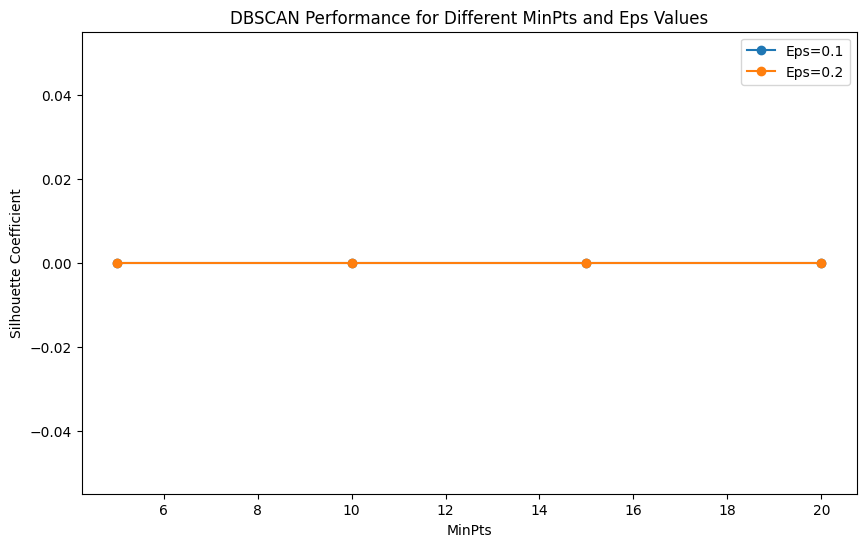

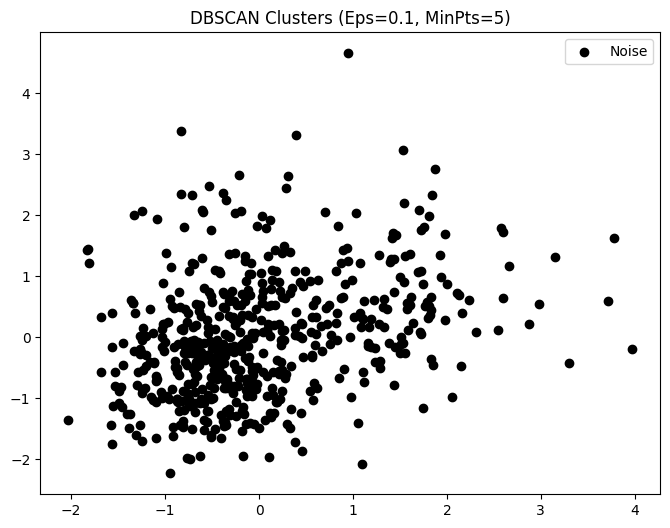

In [58]:
# Plot silhouette scores
plt.figure(figsize=(10, 6))
for eps in eps_values:
    scores = [score if not np.isnan(score) else 0 for score in results[eps]]  # Replace NaN with 0 for display
    plt.plot(min_pts_values, scores, label=f"Eps={eps}", marker='o')
plt.xlabel('MinPts')
plt.ylabel('Silhouette Coefficient')
plt.title('DBSCAN Performance for Different MinPts and Eps Values')
plt.legend()
plt.show()

# Example: Visualize for eps=0.1, min_pts=5
labels = dbscan(X_scaled, eps=0.1, min_pts=5)
plot_clusters(X_scaled, labels, eps=0.1, min_pts=5)

## Q3 - Graph Based clustering with spectral clustering

In [59]:
def gaussian_similarity(X, sigma):
    """
    Compute the Gaussian similarity matrix.
    
    Parameters:
    X (ndarray): The dataset, shape (n_samples, n_features).
    sigma (float): Bandwidth parameter for the Gaussian kernel.
    
    Returns:
    ndarray: Adjacency matrix, shape (n_samples, n_samples).
    """
    n_samples = X.shape[0]
    similarity_matrix = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            diff = np.linalg.norm(X[i] - X[j])**2
            similarity_matrix[i, j] = np.exp(-diff / (2 * sigma**2))
    return similarity_matrix

def laplacian_matrix(similarity_matrix):
    """
    Compute the unnormalized Laplacian matrix.
    
    Parameters:
    similarity_matrix (ndarray): Adjacency matrix, shape (n_samples, n_samples).
    
    Returns:
    ndarray: Laplacian matrix, shape (n_samples, n_samples).
    """
    degree_matrix = np.diag(similarity_matrix.sum(axis=1))
    return degree_matrix - similarity_matrix

In [60]:
def spectral_clustering(X, k, sigma):
    """
    Perform unnormalized spectral clustering.
    
    Parameters:
    X (ndarray): The dataset, shape (n_samples, n_features).
    k (int): Number of clusters.
    sigma (float): Bandwidth parameter for the Gaussian kernel.
    
    Returns:
    ndarray: Cluster labels for each data point, shape (n_samples,).
    """
    # Step 1: Compute the similarity matrix
    similarity_matrix = gaussian_similarity(X, sigma)
    
    # Step 2: Compute the Laplacian matrix
    laplacian = laplacian_matrix(similarity_matrix)
    
    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(laplacian)
    
    # Step 4: Use the first k eigenvectors for clustering
    features = eigenvectors[:, :k]
    
    # Step 5: Normalize rows of eigenvectors
    features = features / np.linalg.norm(features, axis=1, keepdims=True)
    
    # Step 6: Cluster the rows using k-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features)
    return labels

In [61]:
def evaluate_spectral_clustering(X, k_range, sigma_values):
    """
    Evaluate spectral clustering performance for different k and sigma values.
    
    Parameters:
    X (ndarray): The dataset, shape (n_samples, n_features).
    k_range (range): Range of cluster numbers to evaluate (e.g., range(1, 6)).
    sigma_values (list): List of sigma values for the Gaussian kernel.
    
    Returns:
    dict: Dictionary containing silhouette scores for each (k, sigma) pair.
    """
    results = {}
    for sigma in sigma_values:
        scores = []
        for k in k_range:
            if k == 1:
                # Silhouette score is undefined for k=1
                scores.append(np.nan)
                continue
            labels = spectral_clustering(X, k, sigma)
            score = silhouette_score(X, labels)
            scores.append(score)
        results[sigma] = scores
    return results

In [62]:
# Parameters
k_range = range(1, 6)  # Clusters k = 1 to 5
sigma_values = [0.1, 1, 10]


In [64]:

# Evaluate spectral clustering
results = evaluate_spectral_clustering(X_scaled, k_range, sigma_values)

/tmp/ipykernel_4777/1862760634.py:26: RuntimeWarning: divide by zero encountered in divide
  features = features / np.linalg.norm(features, axis=1, keepdims=True)
/tmp/ipykernel_4777/1862760634.py:26: RuntimeWarning: invalid value encountered in divide
  features = features / np.linalg.norm(features, axis=1, keepdims=True)
/home/reggastation/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

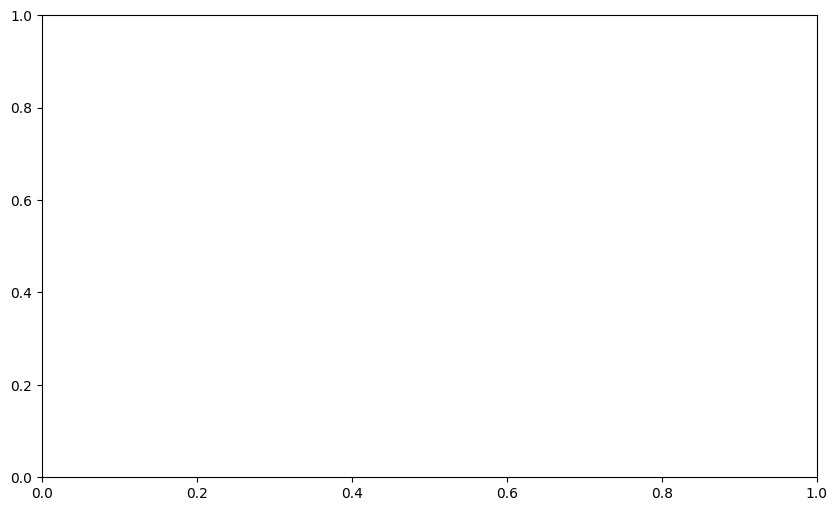

In [ ]:
# Plot results
plt.figure(figsize=(10, 6))
for sigma in sigma_values:
    valid_scores = [score if not np.isnan(score) else 0 for score in results[sigma]]
    plt.plot(k_range, valid_scores, label=f"Sigma={sigma}", marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Spectral Clustering Performance for Different Sigma Values')
plt.legend()
plt.show()